In [1]:
using NamedTrajectories
using QuantumCollocation
using LinearAlgebra

In [4]:
data_path = "results/T_200_Δt_1.0_a_bound_0.25132741228718347_dda_bound_0.01_dt_min_0.5_dt_max_1.5_max_iter_100000_00000..jld2"

"results/T_200_Δt_1.0_a_bound_0.25132741228718347_dda_bound_0.01_dt_min_0.5_dt_max_1.5_max_iter_100000_00000..jld2"

In [5]:
data = load_problem(data_path; return_data=true)

Loaded problem from results/T_200_Δt_1.0_a_bound_0.25132741228718347_dda_bound_0.01_dt_min_0.5_dt_max_1.5_max_iter_100000_00000..jld2:

   pade rollout fidelity = 0.9955649594693736
   exp rollout fidelity = 0.9958532882963038
   solver fidelity = 0.99881150769843
   pulse duration = 276.25790172154143


Dict{String, Any} with 8 entries:
  "options"               => Options{Float64}(1.0e-8, 100.0, 100000, 1.0e6, 1.0…
  "pade rollout fidelity" => 0.995565
  "exp rollout fidelity"  => 0.995853
  "params"                => Dict{Symbol, Any}(:eval_hessian=>true, :objective_…
  "solver fidelity"       => 0.998812
  "system"                => QuantumSystem{Float64}([0.0 0.0 … 0.0 0.0; 0.0 -0.…
  "trajectory"            => NamedTrajectory([1.0 1.0 … 0.995005 0.995931; 0.0 …
  "pulse duration"        => 276.258

In [10]:
traj = data["trajectory"]
system = data["system"]

QuantumSystem{Float64}([0.0 0.0 … 0.0 0.0; 0.0 -0.37699111843078015 … 0.0 0.0; … ; 0.0 0.0 … 0.37699111843077304 0.0; 0.0 0.0 … 0.0 -7.105427357601002e-15], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 1.0; 0.0 0.0 … 1.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; -0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … -0.0 0.0]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0

In [11]:
U_goal = traj.goal.Ũ⃗ |> iso_vec_to_operator

8×8 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  1.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  1.0+0.0im

In [13]:
# |0⟩ rollout test
ψ = qubit_system_state("100")
ψ̃ = ket_to_iso(ψ)
ψ̃_goal = ket_to_iso(U_goal * ψ)
Ψ̃ = rollout(ψ̃, traj.a, traj.Δt, system)
Ψ̃_exp = rollout(ψ̃, traj.a, traj.Δt, system; integrator=exp)

16×200 Matrix{Float64}:
 0.0   0.0           0.00333927    0.00458347   …   0.0285587   -6.63704e-5
 0.0  -0.000920166  -0.00376267   -0.00933439       0.857423     0.997779
 0.0  -0.011042     -0.0411086    -0.080967         0.0349536    0.0238415
 0.0   0.0           0.00412984    0.0157081       -0.00490413   0.00179958
 1.0   0.866576      0.500599      0.00010774       0.0138594    0.0207622
 0.0   0.0           0.0558642     0.166099     …   0.0364641   -0.00028053
 0.0   0.0          -0.0311785    -0.0758304       -0.00343366  -0.00828352
 0.0   0.0          -0.000831514  -0.00838513      -0.00622447  -0.00608769
 0.0   0.0           0.00569371    0.0137197       -0.0129103   -0.00720264
 0.0  -3.06506e-18   0.000240159   0.000451745     -0.508081    -0.0170409
 0.0  -0.0414332    -0.0718291    -0.0826865    …   0.0189703   -0.0228326
 0.0   0.0          -0.00295448   -0.0118181       -0.00651259  -0.00263751
 0.0  -0.497199     -0.858871     -0.974141         0.020055     0.011

In [14]:
pade_rollout_fidelity = fidelity(Ψ̃[:, end], ψ̃_goal)
exp_rollout_fidelity = fidelity(Ψ̃_exp[:, end], ψ̃_goal)

0.9958532882963038

In [15]:
println("|100⟩ → U|100⟩ = |001⟩ pade rollout fidelity:  ", pade_rollout_fidelity)
println("|100⟩ → U|100⟩ = |001⟩ exp rollout fidelity:   ", exp_rollout_fidelity)

|100⟩ → U|100⟩ = |001⟩ pade rollout fidelity:  0.9955649594693736
|100⟩ → U|100⟩ = |001⟩ exp rollout fidelity:   0.9958532882963038


In [16]:
G(U) = 1 - abs2(tr(U_goal'U)) / size(U, 1)^2

G (generic function with 1 method)

In [17]:
G(iso_vec_to_operator(traj.Ũ⃗[:, end]))

0.0023755720891892596

In [18]:
10^-4

0.0001

In [20]:
rollout_traj = NamedTrajectory(
    (
        ψ̃ = Ψ̃_exp,
        a = traj.a,
        Δt = traj.Δt,
    );
    timestep=:Δt,
    controls=(:a, :Δt),
)

NamedTrajectory([0.0 0.0 … 0.028558730023491134 -6.637043477087078e-5; 0.0 -0.0009201661092075455 … 0.8574233553396715 0.9977789812829494; … ; 0.0 -0.01648829099656267 … -0.021773874547081733 0.0; 1.3812895086075756 1.3812895086075845 … 1.3812895086076034 1.3812895086077068], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -0.048112084268297536, -0.0024666870723977457, 0.003930357823414018, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3812895086077068], 200, :Δt, 23, (ψ̃ = 16, a = 6, Δt = 1, states = 16, controls = 7), NamedTuple(), NamedTuple(), NamedTuple(), NamedTuple(), (ψ̃ = 1:16, a = 17:22, Δt = 23:23, states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], controls = [17, 18, 19, 20, 21, 22, 23]), (:ψ̃, :a, :Δt), (:a, :Δt))

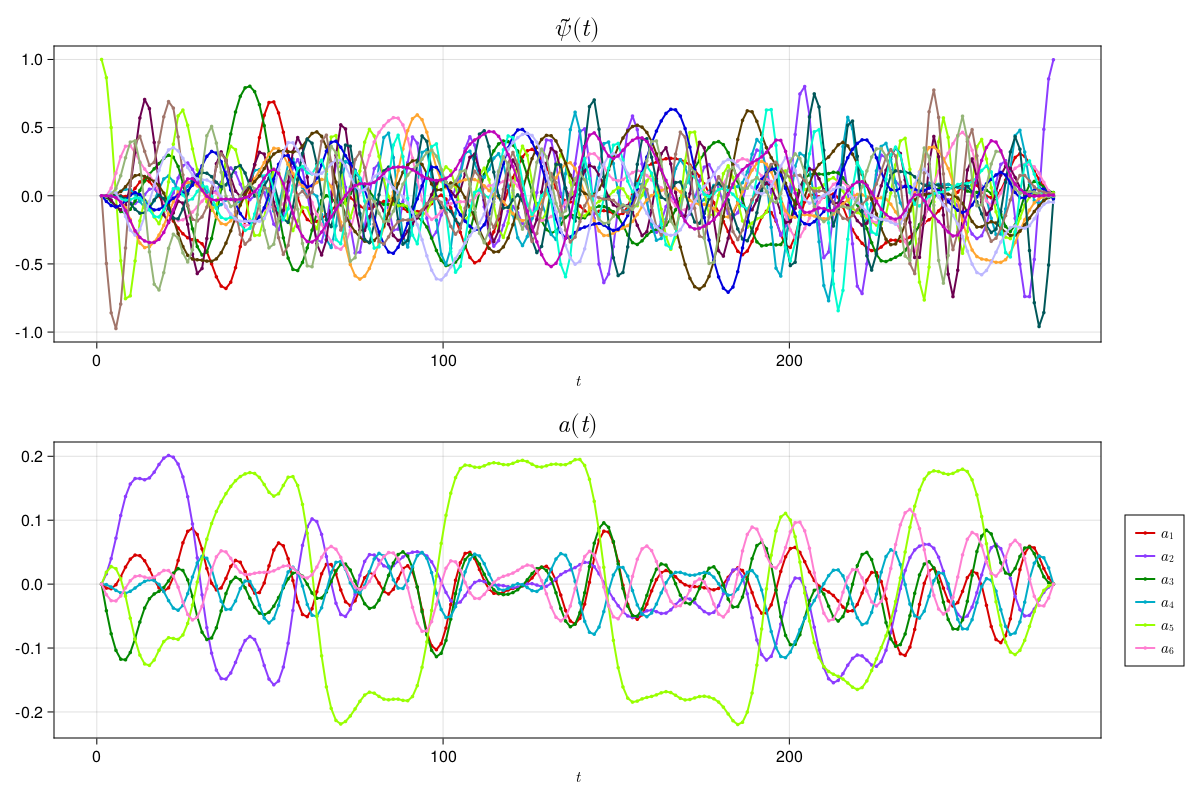

In [21]:
plot(rollout_traj; ignored_labels=[:ψ̃])